In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Ayiti Analytics Data Processing Bootcamp
  Ayiti Analytics Data wants to expand its training centers throughout all the communes of the country. Your role as a data analyst is to help them realize this dream.

Its objective is to know which three communes of the country will be the most likely to expand its training centers.

Knowing that each cohort must have 30 students
 
* How many applications must be made to select 25% women for each on average

* What are the most effective communication channels (Alumni, Facebook, WhatsApp, Friend ...) that will allow a student to be susceptible to selection
 
* What is the average number of university students who should participate in this program
* What will be the average number of applications per week that we could have
* How many weeks should we extend the application process to select 60 students per commune?
* If we were to do all the bootcamp online, who would be the best communes and how many applications would we need to select 30 student and what percentage of students would have a laptop, an internet connection, both at the same time
* What are the most effective communication channels (Alumni, Facebook, WhatsApp, Friend ...) that will allow a women to be susceptible to selection

### NB 
Use the same framework of the BA project to complete this project


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date 

In [27]:
commune=pd.read_excel(r"commune.xlsx")
enroll = pd.read_csv(r"enroll.csv")
quest = pd.read_csv(r"quest.csv")
industry = pd.read_csv(r"industry.csv")
ord = pd.read_csv(r"ord.csv")
study_domain = pd.read_csv(r"study_domain.csv")
transaction = pd.read_csv(r"transaction.csv")
technology = pd.read_csv(r"technology.csv")

In [28]:
def generate_barchar(data, title ="",abs_value ="Total",rel_value="Percent",figsize =(10,6)):
  plt.figure(figsize=figsize)
  axes = sns.barplot(data=data,y=data.index,x=abs_value)
  i=0
  for tot, perc in zip(data[abs_value],data[rel_value]):
    axes.text(tot/2,
              i,
              str(np.round(perc,2))+ "%",
               fontdict=dict(color='White',fontsize=12,horizontalalignment="center")
              )
    axes.text(tot+3,
              i,
              str(tot),
               fontdict=dict(color='blue',fontsize=12,horizontalalignment="center")
              )
    i+=1
  plt.title(title)
  plt.show()


In [29]:
def prob_category(data,top_n,col="Pclass_letter", abs_value ="Total",rel_value ="Percent",show_plot=False, title="",figsize=()):
  # absolute value
   res1 = data[col].value_counts().to_frame()
   res1.columns = [abs_value]
   res2 = data[col].value_counts(normalize=True).to_frame()
   res2.columns = [rel_value]
   if  not show_plot:
     return pd.concat([res1,res2],axis=1).head(top_n)
   else:
     result = pd.concat([res1,res2],axis=1).head(top_n)
     generate_barchart(data=result, title =title,abs_value =abs_value,rel_value=rel_value,figsize =figsize)
     return result


In [30]:
def generate_barchart(data, title ="",abs_value ="Total",rel_value="Percent",figsize =(10,6)):
  plt.figure(figsize=figsize)
  axes = sns.barplot(data=data,y=data.index,x=abs_value)
  i=0
  for tot, perc in zip(data[abs_value],data[rel_value]):
    axes.text(tot/2,
              i,
              str(np.round(perc*100,2))+ "%",
               fontdict=dict(color='White',fontsize=12,horizontalalignment="center")
              )
    axes.text(tot+3,
              i,
              str(tot),
               fontdict=dict(color='blue',fontsize=12,horizontalalignment="center")
              )
    i+=1
  plt.title(title)
  plt.show()


In [54]:
def Calculate_Age(born) :
    today = date(2021, 6, 18)
    return today.year - born.year - ((today.month,today.day)< (born.month,born.day))

In [55]:
study_domain1 = pd.get_dummies(data=study_domain[["quest_id", "values"]], columns=['values'], prefix="", prefix_sep="")
study_domain2=study_domain1.groupby("quest_id").sum()

In [56]:
technologyy = pd.get_dummies(data=technology[["key", "quest_id", "values"]], columns=['values'], prefix="", prefix_sep="")
technologyyy=technologyy.groupby("quest_id").sum()


In [57]:
industry1=pd.get_dummies(data=industry[["quest_id","key","values"]], columns= ["values"], prefix="", prefix_sep="")
industry2= industry1.groupby("quest_id").sum()
#industry2

In [58]:
#quest1=quest.groupby("quest_id").sum()
quest['department'] = quest['department'].apply(lambda x  : str(x))
quest['department']= quest['department'].apply(lambda x : x.upper())
quest['commune']= quest['commune'].apply(lambda x : x.upper())
quest

merge5=pd.merge(quest,commune, how = 'left', left_on=['department','commune'], right_on=['ADM1_PCODE','Commune_Id'])
#mergee=merge5.isna().sum()
#merge5=merge5.drop(columns=['Commune_en', 'modified_at'])


In [59]:
merge5['created_at'] =merge5['created_at'].apply(lambda x : str(x).split("T")[0])
merge11=pd.merge(left=merge5, right=study_domain2, how = 'left',on='quest_id')


In [60]:
transaction['Payment Method'] = 'Moncash'
ord['Payment Method'] = 'Credit Card/Paypal'
x = transaction.loc[:,['Payment Method','user_id']]
y = ord.loc[:,['Payment Method','user_id']]
trans_ord= pd.concat([x,y],axis=0)

enroll1=pd.merge(left=enroll,right=trans_ord, how = 'left',on = ['user_id'] )

In [61]:
merge20=pd.merge(left=merge11, right=enroll1, how = 'left',on='quest_id')

In [69]:
final_merge=pd.merge(left=merge20, right=enroll1, how = 'left',on='quest_id')

In [63]:

moy_enroll=enroll1['percentage_completed'].value_counts(ascending=True).mean()
moy_enroll
moy_enroll= moy_enroll/10
en=enroll1[enroll1['percentage_completed'] > moy_enroll]
en['percentage_completed'].to_frame
merge_suscept=pd.merge(left=en, right=merge5, how = 'left',on='quest_id')

count                                       \
hear_AA_1 Ayiti Analytics Website Bootcamp Alumni ESIH Facebook Friend   
gender                                                                   
female                          4               8    5        6     11   
male                           11               6   13       34     56   
All                            15              14   18       40     67   

                                                          
hear_AA_1 Instagram LinkedIn WhatsApp other unknown  All  
gender                                                    
female            1        1        9     2       0   47  
male              4       14       57     7       1  203  
All               5       15       66     9       1  250

<Figure size 1440x1080 with 0 Axes>

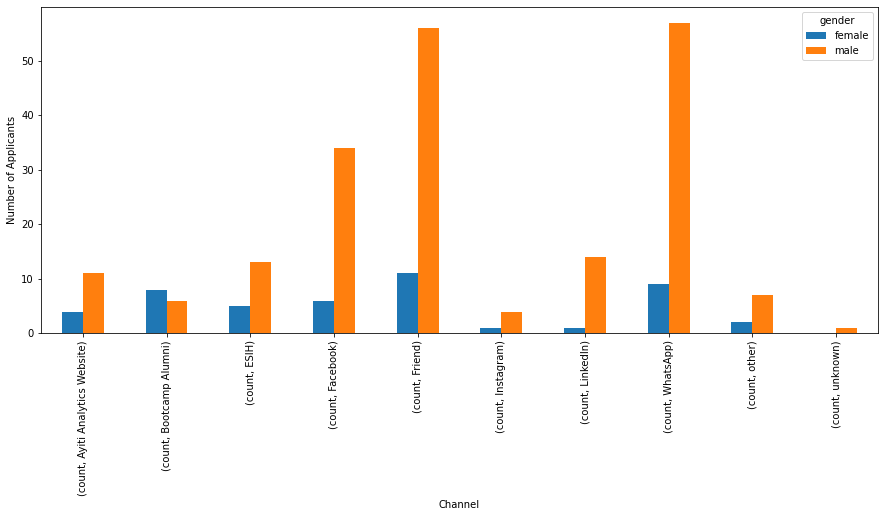

In [93]:
result3 = pd.pivot_table(final_merge,'quest_id',index = ['gender'],columns=['hear_AA_1'],aggfunc=['count'],fill_value = 0)
result4 = pd.pivot_table(final_merge,'quest_id',index = ['gender'],columns=['hear_AA_1'],aggfunc=['count'],fill_value = 0,margins=True)
plt.figure(figsize=(20,15))
ax = result3.sort_index().T.plot(kind='bar',figsize=(15,6))
ylab = ax.set_ylabel('Number of Applicants')
xlab = ax.set_xlabel('Channel')
result4

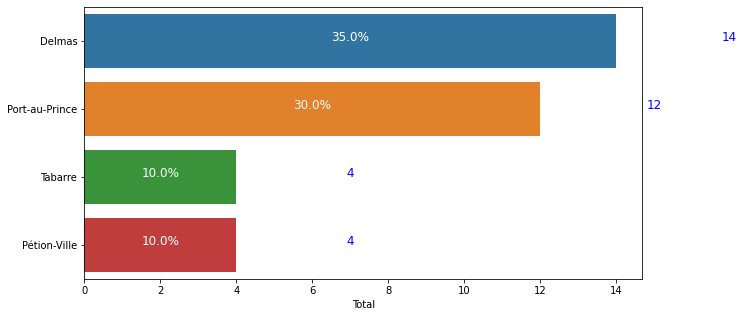

,Total,Percent
Delmas,14,0.35
Port-au-Prince,12,0.30
Tabarre,4,0.10
Pétion-Ville,4,0.10


In [94]:
prob_category(data=merge_suscept,top_n =4 ,col="Commune_FR",abs_value ="Total",rel_value ="Percent",show_plot=True, title="",figsize=(10,5))

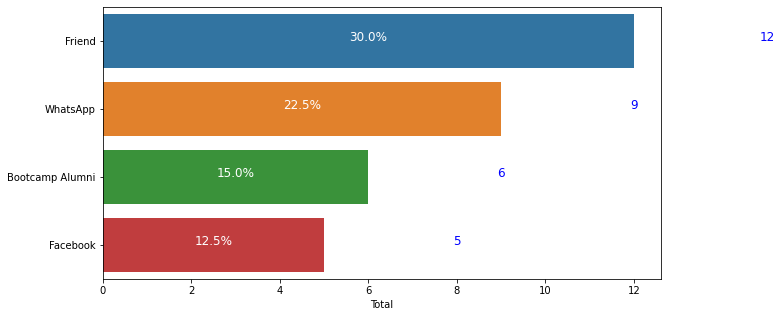

,Total,Percent
Friend,12,0.300
WhatsApp,9,0.225
Bootcamp Alumni,6,0.150
Facebook,5,0.125


In [65]:
#merge200=pd.merge(left=en, right=merge5, how = 'left',on='quest_id')

prob_category(data=merge_suscept,top_n =4 ,col="hear_AA_1",abs_value ="Total",rel_value ="Percent",show_plot=True, title="",figsize=(10,5))

,count
gender,female
hear_AA_1,
Bootcamp Alumni,3
WhatsApp,3
Facebook,2
Friend,2
LinkedIn,1


<Figure size 1440x1080 with 0 Axes>

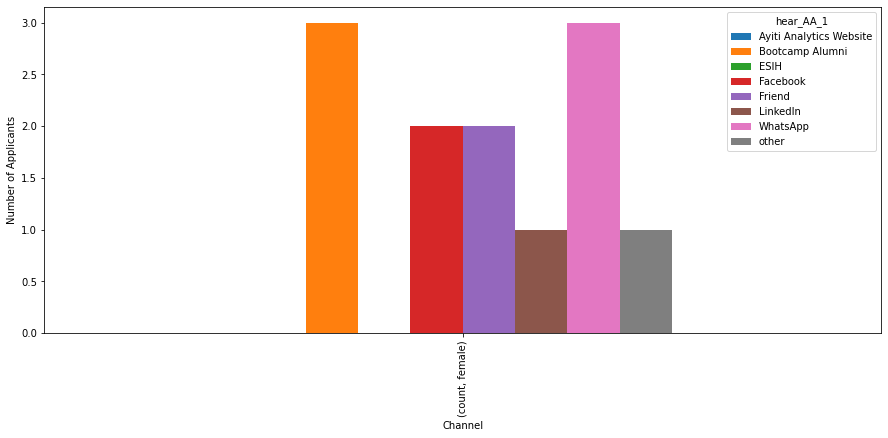

In [96]:
hearr_girl = pd.pivot_table(merge_suscept,'quest_id',index = ['hear_AA_1'],columns=['gender'],aggfunc=['count'],fill_value = 0)
hearr=hearr_girl.iloc[:,:1]
plt.figure(figsize=(20,15))
ax = hearr.sort_index().T.plot(kind='bar',figsize=(15,6))
ylab = ax.set_ylabel('Number of Applicants')
xlab = ax.set_xlabel('Channel') 
hearr.sort_values(by=('count','female'),ascending=False).head(5)

In [97]:
final_merge['dob'] = final_merge['dob'].astype(str)

final_merge['dob'].replace({'3 aout 1977':'03/08/1977'},inplace = True)
final_merge['dob'] = pd.to_datetime(final_merge['dob'])


final_merge['Age'] = final_merge['dob'].apply(Calculate_Age)
final_merge.reset_index()

,index,Unnamed: 0_x,gender,dob,Age,commune,created_at_x,modified_at,department,education_level,...,course_id_y,percentage_completed_y,completed_at_y,expired_y,is_free_trial_y,completed_y,started_at_y,activated_at_y,updated_at_y,Payment Method_y
0,0,0,male,1998-08-25,22.0,HT0111,2021-02-14,2021-02-14T23:03:52.768462Z,NAN,unknown,...,1047613.0,0.000000,NaN,False,True,False,2021-02-17T08:43:53.457Z,NaN,2021-02-17T08:44:09.561Z,NaN
1,1,1,female,1996-09-29,24.0,HT0111,2021-02-16,2021-02-16T16:01:10.861899Z,HT01,Bachelors (bacc +4),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,male,1996-05-17,25.0,HT0111,2021-02-16,2021-02-16T16:56:30.579563Z,HT01,Bachelors (bacc +4),...,1047613.0,0.325581,NaN,False,False,False,2021-02-20T21:20:37.814Z,2021-03-03T23:00:11.000Z,2021-03-09T13:57:49.729Z,Moncash
3,3,3,male,1996-11-24,24.0,HT0111,2021-02-16,2021-02-16T16:57:55.754582Z,HT01,Bachelors (bacc +4),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4,male,1997-07-20,23.0,HT0111,2021-02-16,2021-02-16T17:05:40.907982Z,HT01,High School (16 years),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,245,245,male,1994-02-15,27.0,HT0621,2021-03-02,2021-03-02T18:39:19.873237Z,HT06,Bachelors (bacc +4),...,1047613.0,0.883721,NaN,False,False,False,2021-03-02T18:45:27.034Z,2021-03-02T18:53:20.000Z,2021-03-13T05:43:58.022Z,Moncash
246,246,246,male,1990-08-10,30.0,HT0621,2021-03-10,2021-03-10T04:12:49.436213Z,HT06,Bachelors (bacc +4),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
247,247,247,male,1993-12-28,27.0,HT0621,2021-03-14,2021-03-14T15:29:32.474055Z,HT06,Bachelors (bacc +4),...,1047613.0,0.325581,NaN,False,False,False,2021-03-14T15:34:56.007Z,2021-03-14T15:34:39.768Z,2021-03-14T17:30:53.379Z,Credit Card/Paypal
248,248,248,male,1992-04-17,29.0,HT0412,2021-03-08,2021-03-08T16:35:07.806161Z,HT04,Bachelors (bacc +4),...,1047613.0,0.418605,NaN,False,False,False,2021-03-08T19:10:36.694Z,2021-03-08T19:06:32.000Z,2021-03-14T16:28:07.992Z,Moncash


In [98]:
#check_for_nan = final_merge['Age'].isnull().sum()
#check_for_nan
move = final_merge.pop('Age')
final_merge.insert(3,'Age',move)
final_merge['Age'] = final_merge['Age'].fillna(final_merge['Age'].mean())
final_merge['Age'] = final_merge['Age'].astype(int)
final_merge['quest_id']
final_merge.columns

Index(['Unnamed: 0_x', 'gender', 'dob', 'Age', 'commune', 'created_at_x',
       'modified_at', 'department', 'education_level', 'university',
       'study_domain', 'current_employed', 'formal_sector_job',
       'have_computer_home', 'internet_at_home', 'hear_AA_1', 'after_AA',
       'quest_id', 'Commune_en', 'Commune_FR', 'Commune_Id', 'Departement',
       'ADM1_PCODE', 'Accounting', 'Computer Science', 'Economics',
       'Electrical Engineering', 'Law', 'Management', 'Medicine', 'Statistics',
       'other', 'Unnamed: 0_y', 'created_at_y', 'expiry_date_x', 'user_id_x',
       'course_name_x', 'course_id_x', 'percentage_completed_x',
       'completed_at_x', 'expired_x', 'is_free_trial_x', 'completed_x',
       'started_at_x', 'activated_at_x', 'updated_at_x', 'Payment Method_x',
       'Unnamed: 0', 'created_at', 'expiry_date_y', 'user_id_y',
       'course_name_y', 'course_id_y', 'percentage_completed_y',
       'completed_at_y', 'expired_y', 'is_free_trial_y', 'completed_y',
 

In [99]:
final_merge['Age'].isnull().sum()

0

In [106]:
for col in final_merge.columns:
  print(f"{col} ->{final_merge[col].nunique()}")

Unnamed: 0 ->250
gender ->2
dob ->236
commune ->35
created_at ->28
department ->10
education_level ->6
university ->7
study_domain ->31
current_employed ->3
formal_sector_job ->3
have_computer_home ->3
internet_at_home ->3
hear_AA_1 ->10
after_AA ->7
quest_id ->250
Commune_FR ->35
Commune_Id ->35
Departement ->9
ADM1_PCODE ->9
Accounting ->2
Computer Science ->2
Economics ->2
Electrical Engineering ->2
Law ->2
Management ->2
Medicine ->2
Statistics ->2
other_x ->2
Payment Method ->2
user_id ->102
Bash ->2
Excel ->2
Git ->2
Java ->2
JavaScript ->2
PHP ->2
PowerBI or Tableau ->2
Python ->2
R ->2
SQL ->2
VBA ->2
other_y ->2
Communications ->2
Consulting ->2
Education ->2
Energy ->2
Finance ->2
Healthcare ->2
Insurance ->2
Manufacturing ->2
Marketing ->2
Public Sector/ Non-Profit Agencies ->2
Retail/ E-Commerce ->2
Technology (Software/ Internet) ->2
Transportation ->2
other ->2
Age ->30


In [108]:
male = final_merge[final_merge.gender=="male"]
female = final_merge[final_merge.gender == "female"]


In [79]:
result4


count                                       \
hear_AA_1 Ayiti Analytics Website Bootcamp Alumni ESIH Facebook Friend   
gender                                                                   
female                          4               8    5        6     11   
male                           11               6   13       34     56   
All                            15              14   18       40     67   

                                                          
hear_AA_1 Instagram LinkedIn WhatsApp other unknown  All  
gender                                                    
female            1        1        9     2       0   47  
male              4       14       57     7       1  203  
All               5       15       66     9       1  250

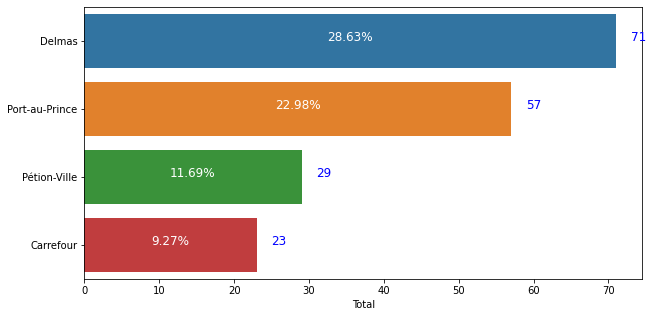

,Total,Percent
Delmas,71,0.286290
Port-au-Prince,57,0.229839
Pétion-Ville,29,0.116935
Carrefour,23,0.092742


In [100]:
#fifi=pd.pivot_table(final_merge,'quest_id',index = ['gender'],columns=['Commune_FR'],aggfunc=['count'],fill_value = 0,margins=True)
prob_category(data=final_merge,top_n =4 ,col="Commune_FR",abs_value ="Total",rel_value ="Percent",show_plot=True, title="",figsize=(10,5))



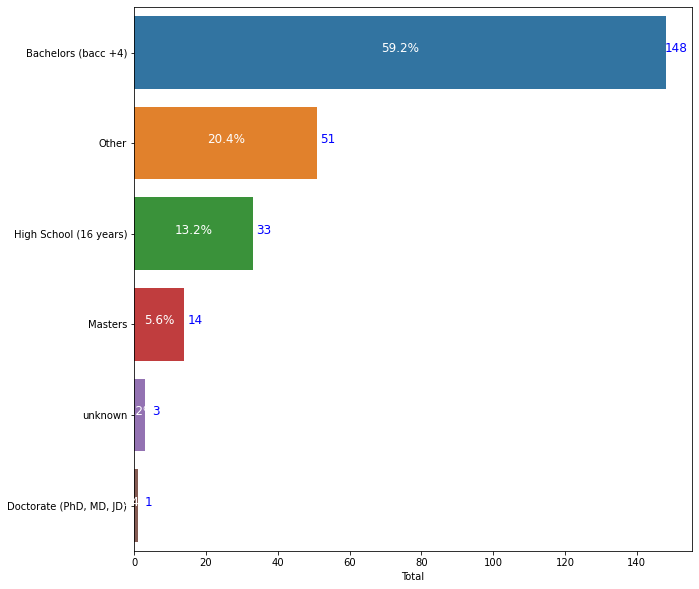

,Total,Percent
Bachelors (bacc +4),148,0.592
Other,51,0.204
High School (16 years),33,0.132
Masters,14,0.056
unknown,3,0.012
"Doctorate (PhD, MD, JD)",1,0.004


In [101]:
prob_category(data=final_merge ,top_n=7, col="education_level",abs_value ="Total",rel_value ="Percent",show_plot=True, title="",figsize=(10,10))

In [102]:
result999 =final_merge[(final_merge['education_level'] =='Bachelors (bacc +4)') | (final_merge['education_level'] =='Masters') | (final_merge['education_level'] =='Doctorate (PhD, MD, JD)')  ]
result999
result999.shape[0]/final_merge.shape[0]

0.652

<Figure size 720x432 with 0 Axes>

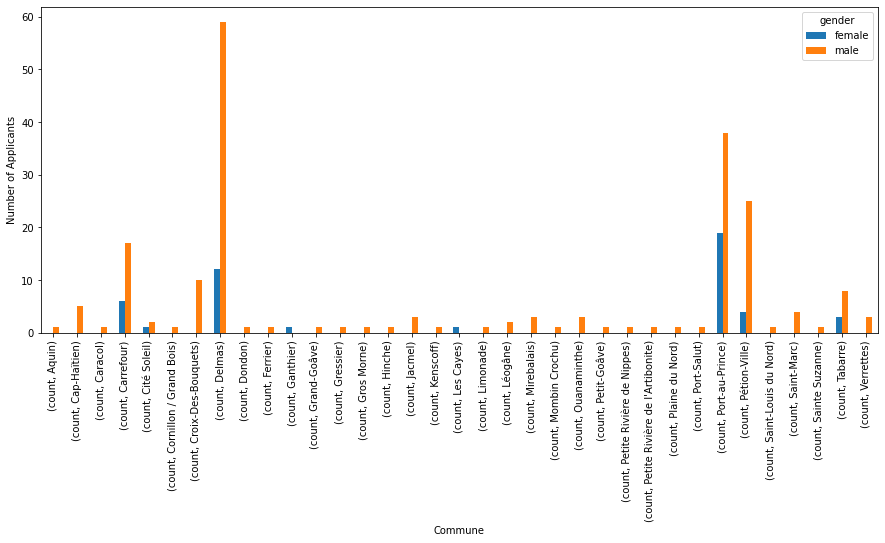

In [104]:
result2 = pd.pivot_table(final_merge,'quest_id',index = ['gender'],columns=['Commune_FR'],aggfunc=['count'],fill_value=0)
#res=result2.sort_values(by=('count','male'),ascending=False)
#res=res.iloc[:5,:]
#generate_barchart(data=res,title="Total et Percent By Sex",abs_value="Total",rel_value="Percent")
plt.figure(figsize=(10,6))
ax = result2.sort_index().T.plot(kind='bar',figsize=(15,6))
ylab = ax.set_ylabel('Number of Applicants')
xlab = ax.set_xlabel('Commune')

In [85]:
result2

count                                            \
Commune_FR Aquin Cap-Haïtien Caracol Carrefour Cité Soleil   
gender                                                       
female         0           0       0         6           1   
male           1           5       1        17           2   

                                                                            \
Commune_FR Cornillon / Grand Bois Croix-Des-Bouquets Delmas Dondon Ferrier   
gender                                                                       
female                          0                  0     12      0       0   
male                            1                 10     59      1       1   

            ...                                                           \
Commune_FR  ... Petite Rivière de l'Artibonite Plaine du Nord Port-Salut   
gender      ...                                                            
female      ...                              0              0          0   
male        ...                              1              1          1   

                                                                       \
Commune_FR Port-au-Prince Pétion-Ville Saint-Louis du Nord Saint-Marc   
gender                                                                  
female                 19            4                   0          0   
male                   38           25                   1          4   

                                             
Commune_FR Sainte Suzanne Tabarre Verrettes  
gender                                       
female                  0       3         0  
male                    1       8         3  

[2 rows x 35 columns]

In [87]:
quest.set_index('gender')
a=quest.loc[:,['university']]
a


,university
0,unknown
1,other
2,Université d'Etat d'Haïti (UEH)
3,Ecole Supérieure d'Infotronique d'Haïti (ESIH)
4,unknown
...,...
245,other
246,Université d'Etat d'Haïti (UEH)
247,Centre de Techniques de Planification et d'Eco...
248,other


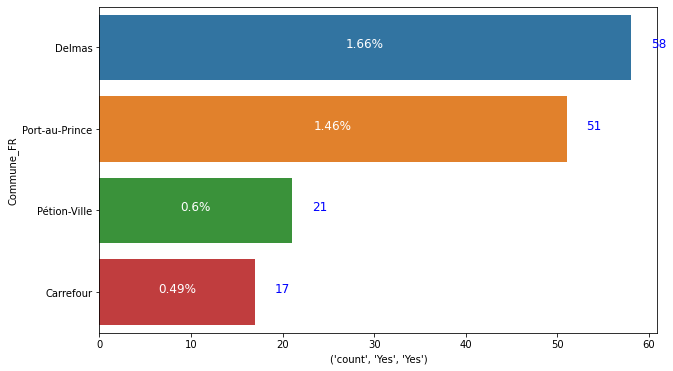

,count,Percent
internet_at_home,Yes,
have_computer_home,Yes,
Commune_FR,,
Delmas,58,1.657143
Port-au-Prince,51,1.457143
Pétion-Ville,21,0.600000
Carrefour,17,0.485714


In [105]:
e = pd.pivot_table(final_merge,'quest_id',index='Commune_FR',columns=['internet_at_home','have_computer_home'],aggfunc = ['count'],fill_value=0)
#app = e.sort_values(by=('count','Yes','Yes'),ascending = False)
e

g=e.iloc[:,3:4]
g
#prob_category(data=g ,top_n=7, col='internet_at_home','have_computer_home',abs_value ="Total",rel_value ="Percent",show_plot=True, title="",figsize=(10,10))
both=g.sort_values(by=('count','Yes','Yes'),ascending = False)

#g['Percent'] = g[('count','Yes','Yes')]/g.shape[0]
#prob_category(data=g ,top_n=5, col=('count','Yes','Yes'),abs_value ="Total",rel_value ="Percent",show_plot=True, title="",figsize=(10,15))
#generate_barchart(g, title ="",abs_value =('count','Yes','Yes'),rel_value="Percent",figsize =(10,6))
both=both.iloc[:4,:]
both['Percent'] = both[('count','Yes','Yes')]/g.shape[0]
generate_barchar(both, title ="",abs_value =('count','Yes','Yes'),rel_value="Percent",figsize =(10,6))
both

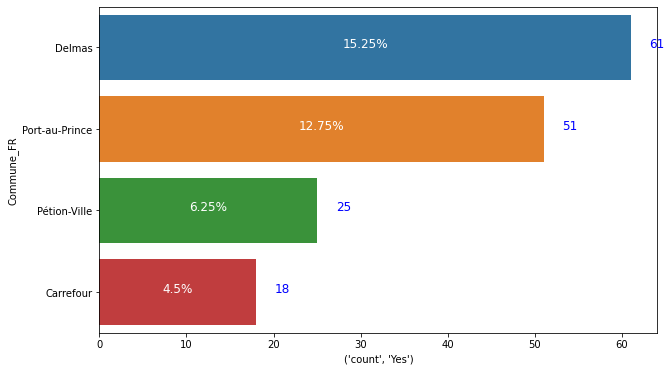

,count,Percent
internet_at_home,Yes,
Commune_FR,,
Delmas,61,15.25
Port-au-Prince,51,12.75
Pétion-Ville,25,6.25
Carrefour,18,4.50


In [108]:
internet = pd.pivot_table(final_merge,'quest_id',index='Commune_FR',columns=['internet_at_home'],aggfunc = ['count'],fill_value=0)
internet=internet.iloc[:,1:2]
internet=internet.sort_values(by=('count','Yes'),ascending=False)
internet=internet.iloc[:4,:]
internet['Percent'] = internet[('count','Yes')]/internet.shape[0]
generate_barchar(internet, title ="",abs_value =('count','Yes'),rel_value="Percent",figsize =(10,6))
internet

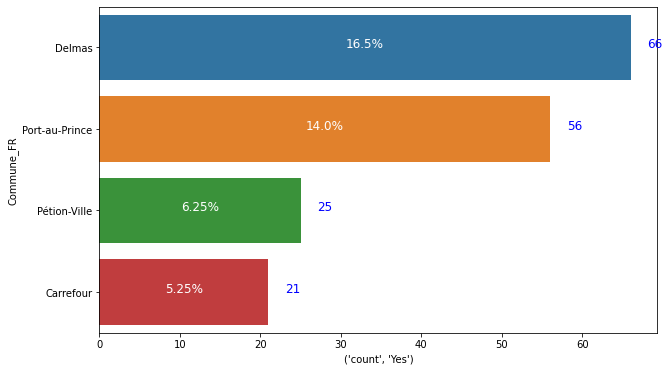

,count,Percent
have_computer_home,Yes,
Commune_FR,,
Delmas,66,16.50
Port-au-Prince,56,14.00
Pétion-Ville,25,6.25
Carrefour,21,5.25


In [90]:
computer = pd.pivot_table(final_merge,'quest_id',index='Commune_FR',columns=['have_computer_home'],aggfunc = ['count'],fill_value=0)
computer=computer.iloc[:,1:2]
computer=computer.sort_values(by=('count','Yes'),ascending=False)
computer=computer.iloc[:4,:]
computer['Percent'] = computer[('count','Yes')]/internet.shape[0]
generate_barchar(computer, title ="",abs_value =('count','Yes'),rel_value="Percent",figsize =(10,6))
computer

In [109]:
resss=pd.pivot_table(final_merge,'quest_id',index = ['gender'],columns=['education_level'],aggfunc=['count'],fill_value = 0)
resss

count                          \
education_level Bachelors (bacc +4) Doctorate (PhD, MD, JD)   
gender                                                        
female                           23                       0   
male                            125                       1   

                                                              
education_level High School (16 years) Masters Other unknown  
gender                                                        
female                               5       5    13       1  
male                                28       9    38       2

In [110]:
final_merge["male"] =final_merge["gender"].apply(lambda x: 1 if x == "male" else 0)
final_merge["female"] =final_merge["gender"].apply(lambda x: 1 if x=="female" else 0)
registration =final_merge[["created_at","male", "female"]].groupby(pd.Grouper(key="created_at",freq='7D').sum()
#registration
#registration['sum']=registration['male']+registration['female']
#registration.head()
#registration['frequencies']=registration['sum']/result5.shape[0]
#registration.head()
#registration_mean=(registration['sum'].sum())/registration.shape[0]
#registration.head()
#prob_category(data=registration,col="frequencies",show_plot=True,figsize= (3,2), title="Repartition des...")
#graph12=generate_barchart(data=registration,title="aaaaaaaaaaaa",abs_value="sum",rel_value="frequencies", horizontal=False)

SyntaxError: unexpected EOF while parsing (<ipython-input-110-449d09819555>, line 12)